<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/6_Local_MLP_NoClassWeights_NoEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
!pip install --quiet fastai==2.2.5

     |████████████████████████████████| 194kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 12.8MB 224kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [3]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data = mf.new_processing(data)
data = pd.get_dummies(data)
cols = mf.get_col(data)

In [5]:
n_clients = 4

def splitData(data, n_clients):
  X = {}
  y = {}
  shuffled = data.sample(frac=1)
  result = np.array_split(shuffled, n_clients) 
  i = 0
  for dataset in result:
    y[i] = dataset['isFraud']
    X[i] = dataset.drop(columns=['isFraud'])
    i += 1
  return X, y

X, y = splitData(data, n_clients)

## Train validation test split

Splitto il dataset in train, validation e test set. 

In [6]:
def overSampling(X, y, frac_over=0.3):
  from imblearn.over_sampling import SMOTE
  sm = SMOTE(sampling_strategy=frac_over, random_state=42)
  X_sm, y_sm = sm.fit_resample(X, y)  
  return X_sm, y_sm


def underSampling(X, y, frac_under=0.1):
  from imblearn.under_sampling import RandomUnderSampler 
  us = RandomUnderSampler(sampling_strategy=frac_under, random_state=42)
  X_us, y_us = us.fit_resample(X, y)
  return X_us, y_us

In [7]:
X_train = {}
y_train = {}
X_test = {}
X_val = {}
y_test = {}
y_val = {}
for i in range(n_clients):
  X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size = 0.2)
  X_train[i], y_train[i]  = underSampling(X_train[i], y_train[i])
  X_train[i], y_train[i] = overSampling(X_train[i], y_train[i])
  X_train[i], X_val[i], y_train[i], y_val[i] = train_test_split(X_train[i], y_train[i], test_size=0.25, random_state=42)

# Neural Network

Kaggle tutorial https://www.kaggle.com/colinmorris/embedding-layers

Implementation: https://www.kaggle.com/blaskowitz100/dnn-keras-and-categorical-feature-embedding

**************************************************************************************************************
Training model 0
Epoch 1/30
80/80 [==============================] - 2s 15ms/step - loss: 0.5793 - accuracy: 0.7312 - recall: 0.5989 - precision: 0.4524 - val_loss: 0.5246 - val_accuracy: 0.7911 - val_recall: 0.1034 - val_precision: 0.9339
Epoch 2/30
80/80 [==============================] - 1s 10ms/step - loss: 0.3761 - accuracy: 0.8389 - recall: 0.4892 - precision: 0.7205 - val_loss: 0.4930 - val_accuracy: 0.8271 - val_recall: 0.3688 - val_precision: 0.7590
Epoch 3/30
80/80 [==============================] - 1s 10ms/step - loss: 0.3592 - accuracy: 0.8468 - recall: 0.5058 - precision: 0.7462 - val_loss: 0.5501 - val_accuracy: 0.8155 - val_recall: 0.6236 - val_precision: 0.5965
Epoch 4/30
80/80 [==============================] - 1s 9ms/step - loss: 0.3429 - accuracy: 0.8550 - recall: 0.5209 - precision: 0.7686 - val_loss: 0.4338 - val_accuracy: 0.8395 - val_recall: 0.4225 - val

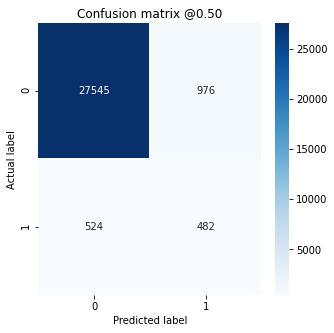

AUC:  0.8412526837502387
Average precision:  0.38293877886742644
Accuracy:  0.949199038168456
F1 score:  0.39123376623376627
Recall:  0.47912524850894633
Precision:  0.33058984910836764
**************************************************************************************************************
**************************************************************************************************************
Training model 1
Epoch 1/30
79/79 [==============================] - 2s 15ms/step - loss: 0.5447 - accuracy: 0.7468 - recall: 0.6395 - precision: 0.4801 - val_loss: 0.5586 - val_accuracy: 0.7906 - val_recall: 0.0982 - val_precision: 0.9325
Epoch 2/30
79/79 [==============================] - 1s 9ms/step - loss: 0.3691 - accuracy: 0.8434 - recall: 0.4969 - precision: 0.7293 - val_loss: 0.5506 - val_accuracy: 0.8155 - val_recall: 0.2569 - val_precision: 0.8171
Epoch 3/30
79/79 [==============================] - 1s 9ms/step - loss: 0.3509 - accuracy: 0.8501 - recall: 0.5234 - precision: 0.

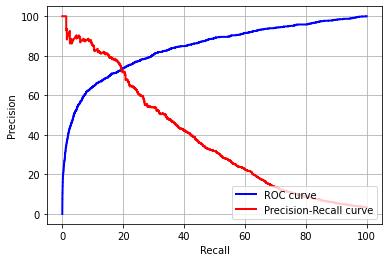

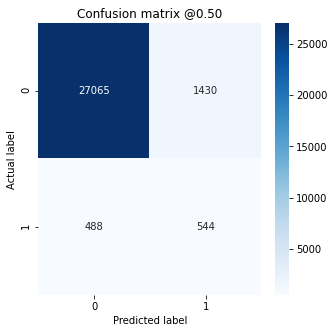

AUC:  0.8466869782676412
Average precision:  0.3808484204007047
Accuracy:  0.9350425034713991
F1 score:  0.3619427811044577
Recall:  0.5271317829457365
Precision:  0.2755825734549139
**************************************************************************************************************
**************************************************************************************************************
Training model 2
Epoch 1/30
79/79 [==============================] - 2s 15ms/step - loss: 0.5777 - accuracy: 0.7296 - recall: 0.5890 - precision: 0.4537 - val_loss: 0.5027 - val_accuracy: 0.7931 - val_recall: 0.1057 - val_precision: 0.9474
Epoch 2/30
79/79 [==============================] - 1s 9ms/step - loss: 0.3837 - accuracy: 0.8315 - recall: 0.4784 - precision: 0.7086 - val_loss: 0.4704 - val_accuracy: 0.7906 - val_recall: 0.0933 - val_precision: 0.9533
Epoch 3/30
79/79 [==============================] - 1s 10ms/step - loss: 0.3579 - accuracy: 0.8465 - recall: 0.5010 - precision: 0.74

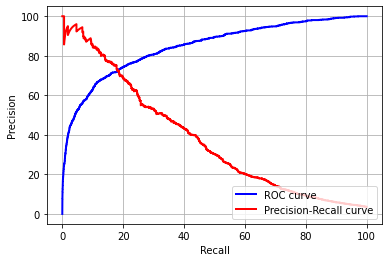

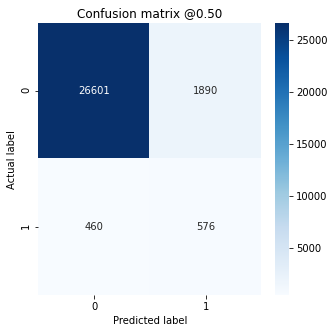

AUC:  0.8518868113740179
Average precision:  0.37988452218597435
Accuracy:  0.9204118264639144
F1 score:  0.3289548829240434
Recall:  0.555984555984556
Precision:  0.23357664233576642
**************************************************************************************************************
**************************************************************************************************************
Training model 3
Epoch 1/30
79/79 [==============================] - 3s 16ms/step - loss: 0.5579 - accuracy: 0.7517 - recall: 0.6305 - precision: 0.4831 - val_loss: 0.4931 - val_accuracy: 0.8021 - val_recall: 0.1538 - val_precision: 0.9447
Epoch 2/30
79/79 [==============================] - 1s 10ms/step - loss: 0.3660 - accuracy: 0.8454 - recall: 0.5104 - precision: 0.7399 - val_loss: 0.4621 - val_accuracy: 0.8138 - val_recall: 0.2189 - val_precision: 0.9043
Epoch 3/30
79/79 [==============================] - 1s 10ms/step - loss: 0.3531 - accuracy: 0.8507 - recall: 0.5248 - precision: 0.

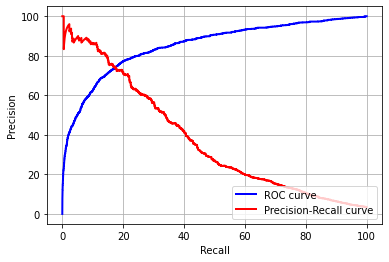

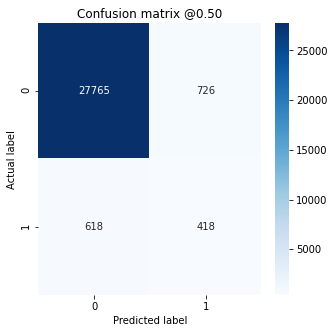

AUC:  0.8308951353465411
Average precision:  0.3500698003896653
Accuracy:  0.9544823381989366
F1 score:  0.38348623853211006
Recall:  0.4034749034749035
Precision:  0.36538461538461536
**************************************************************************************************************


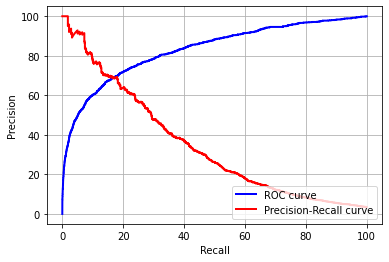

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

for i in range(n_clients):
  keras.backend.clear_session()
  model = Sequential()
  model.add(Input(shape=(X_train[i].shape[1],))) 
  model.add(Dense(360, activation=tf.keras.activations.gelu)) 
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

  print('**************************************************************************************************************')
  print('Training model', i)
  history = model.fit(X_train[i], y_train[i], epochs=30, 
                      batch_size=512, validation_data=(X_val[i],y_val[i]),
                      verbose=1, shuffle = True)

  y_pred = model.predict(X_test[i])

  mf.plot_cm(y_test[i], y_pred, 'Blues')
  mf.plot_roc("ROC curve", y_test[i], y_pred, color='blue')
  mf.plot_ap('Precision-Recall curve', y_test[i], y_pred, color = 'red')

  y_predicted = []
  for prob in y_pred:
    if prob >= 0.5:
      y_predicted.append(1)
    else:
      y_predicted.append(0)

  print('Accuracy: ',accuracy_score(y_test[i], y_predicted))
  print('F1 score: ',f1_score(y_test[i], y_predicted, average="binary"))
  print('Recall: ', recall_score(y_test[i], y_predicted, average='binary'))
  print('Precision: ', precision_score(y_test[i], y_predicted,  average='binary'))
  print('**************************************************************************************************************')


In [ ]:
=